## Lasso Regression , Linear Regression

In [92]:
import os
from scipy import ndimage, misc
from matplotlib import pyplot as plt
import numpy as np
import imageio
%matplotlib inline
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load and split Dataset 

In [93]:
# get excel file
current_dir = Path.cwd()
file = pd.ExcelFile(current_dir / 'County_Training_Test_Normalized_2.xlsx')

# convert to dataframe
df = file.parse("Training Data")

# get dataset
dataset = df.to_numpy()
# print(dataset)

# get features for datapoints
X = np.delete(dataset, [0,1,7,8], axis=1)
X = X.astype(float)
num_features = X.shape[1]
# print(num_features)
# print(X)

# get labels
# 7 corresponds to voter turnout, 8 corresponds to voter turnout in 0,1,2 buckets 
Y = dataset[:,[7]]
Y = Y.astype(float)
Y = Y.ravel()
# print(Y)
Y_bucket = dataset[:,[8]]
Y_bucket = Y_bucket.astype(float)
Y_bucket = Y_bucket.ravel()

# get counties
counties = dataset[:,[1]]

# get feature names
new_df = df.drop("County", axis=1)
new_df = new_df.drop("States", axis=1)
new_df = new_df.drop("Percentage Voter Turnout", axis=1)
new_df = new_df.drop("Labels", axis=1)
feature_names = list(new_df.columns.values)

# print(feature_names)

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X) 
# print(Y)

In [94]:
# print(X.shape)
X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.10, shuffle = True)
# X_train.shape

plt.scatter(features[:, 0], features[:, 1], c=Y, s=50, cmap='autumn')
plot_svc_decision_function(clf);
plt.scatter(feat_test[:, 0], feat_test[:, 1], c=Y_test, s=50)

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# Lasso 

In [96]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import learning_curve,GridSearchCV

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2,1e-1, 0.5, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X, Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01,
                                   0.1, 0.5, 1, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [97]:
lasso_regressor.best_params_

{'alpha': 0.0001}

In [98]:
lasso_regressor.best_score_

-0.007737544932153032

In [99]:
X_test.shape

(263, 5)

training score: 0.015101938788195657
test score:  0.008202108859297397
number of features used:  4
training score for alpha=0.001: 0.015101938788195657
number of features used: for alpha =0.001: 4
training score for alpha=0.0001: 0.016057822475292194
number of features used: for alpha =0.0001: 5
LR training score: 0.016070145790524792


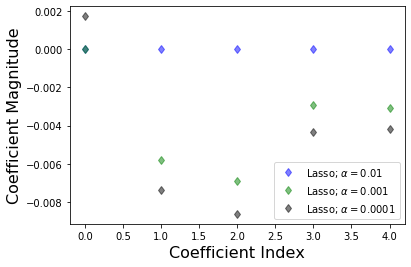

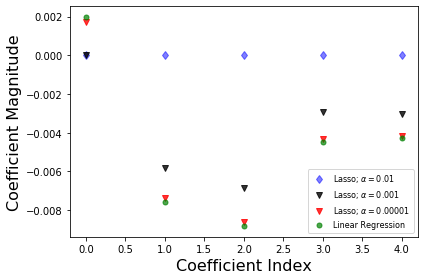

In [100]:
lasso = Lasso(alpha = 0.001, max_iter=10e5)
lasso.fit(X,Y)

Y_pred = lasso.predict(X_test)

train_score=lasso.score(X,Y)
test_score=lasso.score(X_test,Y_test)

coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X,Y)
train_score001=lasso001.score(X,Y)

coeff_used001 = np.sum(lasso001.coef_!=0)

lasso0001 = Lasso(alpha=0.001, max_iter=10e5)
lasso0001.fit(X,Y)
train_score0001=lasso0001.score(X,Y)
train_score0001=lasso0001.score(X,Y)
coeff_used0001 = np.sum(lasso0001.coef_!=0)
print("training score for alpha=0.001:", train_score0001)
print("number of features used: for alpha =0.001:", coeff_used0001)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X,Y)
train_score00001=lasso00001.score(X,Y)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

########## Linear Regression##############
lr = LinearRegression()
lr.fit(X,Y)
lr_train_score=lr.score(X,Y)
print("LR training score:", lr_train_score) 


plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso0001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='green',label=r'Lasso; $\alpha = 0.001$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='black',label=r'Lasso; $\alpha = 0.0001$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)


plt.legend(fontsize=10,loc=4)
plt.show()
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso0001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.001$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='red',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=8,loc=4)
plt.tight_layout()
plt.show()


(27, 5)


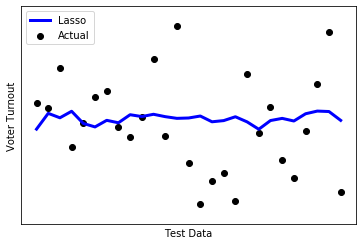

In [135]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)
print(X_test.shape)
x_row =[]
for i in range(0, X_test.shape[0]):
    x_row.append(i)
    
    
plt.scatter(x_row, Y_test,  color='black', label = "Actual")
plt.plot(x_row, Y_pred, color='blue', linewidth=3, label = "Lasso")
plt.legend()
plt.xlabel('Test Data')
plt.ylabel('Voter Turnout')

plt.xticks(())
plt.yticks(())

plt.show()





#### For visualization purposes 

In [101]:
df_all = pd.read_excel('County_Training_Test_Normalized_2.xlsx', sheet_name='Training Data')
df_all = df_all[['States', 'County', 'Percentage Voter Turnout']]
df_all

,States,County,Percentage Voter Turnout
0,Alabama,Autauga County,0.498215
1,Alabama,Baldwin County,0.506508
2,Alabama,Barbour County,0.488079
3,Alabama,Bibb County,0.468127
4,Alabama,Blount County,0.492907
...,...,...,...
2620,West Virginia,Webster County,0.449904
2621,West Virginia,Wetzel County,0.429142
2622,West Virginia,Wirt County,0.425930
2623,West Virginia,Wood County,0.516600


In [103]:
df_y_lasso_pred = pd.DataFrame(data=Y_pred)
df_y_lasso_test = pd.DataFrame(data=Y_test)

df_lasso = pd.concat([df_y_lasso_test, df_y_lasso_pred], axis=1)

df_lasso.columns = ['real_turnout', 'pred_turnout']

df_lasso

,real_turnout,pred_turnout
0,0.531046,0.558326
1,0.457452,0.556284
2,0.659520,0.571764
3,0.592936,0.563390
4,0.489474,0.562874
...,...,...
258,0.609365,0.575670
259,0.460832,0.563054
260,0.652038,0.561134
261,0.534049,0.558070


In [104]:
df_lasso_pred = pd.merge(df_all, df_lasso, left_on='Percentage Voter Turnout', right_on = 'real_turnout', how='inner')
df_lasso_pred

,States,County,Percentage Voter Turnout,real_turnout,pred_turnout
0,Alabama,Colbert County,0.516969,0.516969,0.566752
1,Alabama,Cullman County,0.495729,0.495729,0.565060
2,Alabama,Dale County,0.434685,0.434685,0.561451
3,Alabama,Pickens County,0.588802,0.588802,0.564093
4,Alabama,Pike County,0.433755,0.433755,0.570928
...,...,...,...,...,...
258,West Virginia,Mercer County,0.451659,0.451659,0.556019
259,West Virginia,Ritchie County,0.550268,0.550268,0.554433
260,West Virginia,Summers County,0.459296,0.459296,0.561948
261,West Virginia,Tucker County,0.571884,0.571884,0.556688


### Linear regression


In [136]:
#encode labels
le = preprocessing.LabelEncoder()
encoded_Y = Y#le.fit_transform(Y)
encoded_Y_test = Y_test#le.fit_transform(Y_test)


In [106]:
lr = LinearRegression()
lr.fit(X,Y)
Y_pred = lr.predict(X_test)


lr_train_score=lr.score(X,encoded_Y)
print("LR training score:", lr_train_score)

lr_test_score=lr.score(X_test,encoded_Y_test)
print("LR testing score:", lr_test_score)



(27, 5)


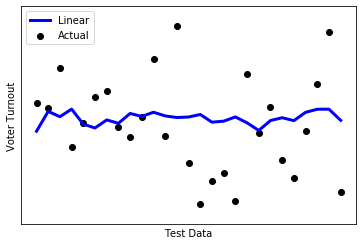

In [138]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)
print(X_test.shape)
x_row =[]
for i in range(0, X_test.shape[0]):
    x_row.append(i)
    
    
plt.scatter(x_row, Y_test,  color='black', label = "Actual")
plt.plot(x_row, Y_pred, color='blue', linewidth=3, label = "Linear")
plt.legend()
plt.xlabel('Test Data')
plt.ylabel('Voter Turnout')

plt.xticks(())
plt.yticks(())

plt.show()




#### For visualization purposes

In [109]:
df_linear_y_pred = pd.DataFrame(data=Y_pred)

df_linear = pd.concat([df_y_lasso_test, df_linear_y_pred], axis=1)

df_linear.columns = ['real_turnout', 'pred_turnout']

df_linear

,real_turnout,pred_turnout
0,0.531046,0.556463
1,0.457452,0.558838
2,0.659520,0.571201
3,0.592936,0.563064
4,0.489474,0.564306
...,...,...
258,0.609365,0.578908
259,0.460832,0.561470
260,0.652038,0.557949
261,0.534049,0.555343


In [111]:
df_linear_pred = pd.merge(df_all, df_linear, left_on='Percentage Voter Turnout', right_on = 'real_turnout', how='inner')
df_linear_pred = df_linear_pred.rename(columns = {'pred_turnout': 'linear_pred_turnout'})

df_linear_pred

,States,County,Percentage Voter Turnout,real_turnout,linear_pred_turnout
0,Alabama,Colbert County,0.516969,0.516969,0.566628
1,Alabama,Cullman County,0.495729,0.495729,0.564544
2,Alabama,Dale County,0.434685,0.434685,0.560400
3,Alabama,Pickens County,0.588802,0.588802,0.562857
4,Alabama,Pike County,0.433755,0.433755,0.571736
...,...,...,...,...,...
258,West Virginia,Mercer County,0.451659,0.451659,0.553521
259,West Virginia,Ritchie County,0.550268,0.550268,0.551070
260,West Virginia,Summers County,0.459296,0.459296,0.561053
261,West Virginia,Tucker County,0.571884,0.571884,0.554526


In [112]:
df_pred_all = pd.concat([df_linear_pred, df_lasso_pred.iloc[:,4]], axis=1)
df_pred_all.to_csv('all_counties_prediction.csv')
df_pred_all

,States,County,Percentage Voter Turnout,real_turnout,linear_pred_turnout,pred_turnout
0,Alabama,Colbert County,0.516969,0.516969,0.566628,0.566752
1,Alabama,Cullman County,0.495729,0.495729,0.564544,0.565060
2,Alabama,Dale County,0.434685,0.434685,0.560400,0.561451
3,Alabama,Pickens County,0.588802,0.588802,0.562857,0.564093
4,Alabama,Pike County,0.433755,0.433755,0.571736,0.570928
...,...,...,...,...,...,...
258,West Virginia,Mercer County,0.451659,0.451659,0.553521,0.556019
259,West Virginia,Ritchie County,0.550268,0.550268,0.551070,0.554433
260,West Virginia,Summers County,0.459296,0.459296,0.561053,0.561948
261,West Virginia,Tucker County,0.571884,0.571884,0.554526,0.556688
